In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from  datetime import date

HPI: House Price Index  aa

In [2]:
def get_year_quarter(d):
    year = d.year
    quarter = (d.month - 1) // 3 + 1
    return f"{year}:Q{quarter}"

In [3]:
goldvisa_start_date=date(2012,10,8)
goldvisa_start_yearquarter=get_year_quarter(goldvisa_start_date)

In [31]:
df_hpi = pd.read_csv('hpi.csv')

In [32]:
df_hpi

,Unnamed: 0,Australia,Belgium,Canada,Switzerland,Germany,Denmark,Spain,Finland,France,...,US,S. Africa,Croatia,Israel,Slovenia,Colombia,Portugal,Unnamed: 27,Aggregate - 2005 Fixed Weights,Aggregate - Dynamic Weights
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1975:Q1,7.59,15.18,16.23,48.83,51.99,15.77,8.67,13.49,11.10,...,17.19,3.56,0.00,0.00,0.00,1.54,3.30,NaN,22.24,22.93
2,1975:Q2,7.75,15.93,16.45,48.19,52.60,16.19,9.71,13.64,11.50,...,17.39,3.63,0.00,0.00,0.00,1.55,3.48,NaN,22.51,23.19
3,1975:Q3,8.05,16.65,17.16,47.73,53.25,17.00,9.91,13.83,11.91,...,17.50,3.64,0.00,0.00,0.00,1.58,3.66,NaN,22.75,23.43
4,1975:Q4,8.29,17.57,17.40,47.14,53.96,17.14,10.65,14.20,12.39,...,17.84,3.72,0.00,0.00,0.00,1.62,3.86,NaN,23.10,23.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,2022:Q4,253.82,194.23,290.35,166.92,187.71,149.64,99.50,136.15,156.84,...,178.48,237.42,183.05,307.91,210.64,430.50,189.67,NaN,172.50,177.37
193,2023:Q1,254.10,194.89,291.05,167.05,181.75,150.75,101.44,133.42,156.18,...,179.60,237.87,187.43,308.22,213.98,439.07,196.13,NaN,172.70,177.41
194,2023:Q2,260.65,194.67,308.23,167.06,178.79,153.11,101.65,132.00,154.89,...,184.65,237.93,193.02,304.88,218.06,447.22,202.11,NaN,174.66,179.50
195,2023:Q3,263.14,194.43,306.76,166.78,175.97,156.53,102.97,129.83,153.42,...,188.11,237.29,193.52,302.85,219.66,455.31,209.22,NaN,175.73,180.69


In [33]:
## Clean Data
df_hpi.drop(columns=['Unnamed: 27', 'Aggregate - 2005 Fixed Weights','Aggregate - Dynamic Weights'], inplace=True)
df_hpi.rename(columns={'Unnamed: 0':'year_quarter'}, inplace=True)
df_hpi = df_hpi.iloc[1:].copy()
df_hpi[['Year', 'Quarter']] = df_hpi['year_quarter'].str.extract(r'(\d{4}):Q(\d)').astype(int)
df_hpi.set_index('year_quarter',inplace=True)


In [37]:
#Divide the data before the golden visa
year=goldvisa_start_date.year
quarter =(goldvisa_start_date.month - 1) // 3 + 1
df_hpi_before = df_hpi.loc[(df_hpi['Year']<=year) & (df_hpi['Quarter']<quarter)].copy()

df_hpi_before.drop(columns=['Year','Quarter'], inplace=True)

In [38]:
fig = go.Figure()

for column in df_hpi_before.columns:
    fig.add_trace(
        go.Scatter(
            x=df_hpi_before.index, 
            y=df_hpi_before[column], 
            mode='lines', 
            name=column
        )
    )

fig.update_layout(
    title="House Prices Index",
    #xaxis_title="Index",
    yaxis_title="HPI Index",
    legend_title="Countires"
)

fig.show()

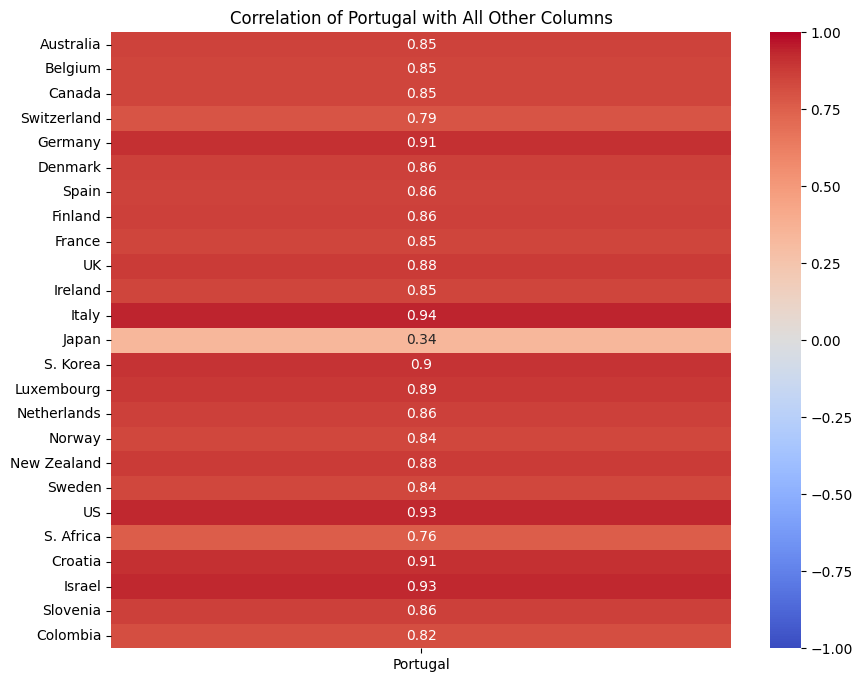

In [39]:
target_column = 'Portugal'

# Calculate correlation matrix
corr_matrix = df_hpi_before.corr()

# Extract correlations of the target column with all others
target_corr = corr_matrix[[target_column]].drop(target_column)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title(f'Correlation of {target_column} with All Other Columns')
plt.show()

In [48]:
related_countries = target_corr.loc[target_corr['Portugal']>=0.9].index.values